# Import liraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

# Load Dataset

In [3]:
volley= pd.read_csv(r"C:\Users\sad57\Desktop\The journey\Data_Sets\EDA\VNL2023.csv")
volley

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH
...,...,...,...,...,...,...,...,...,...,...
126,Graven Leonard,Germany,19,0.00,0.00,0.00,0.00,5.92,1.92,L
127,Balaso Fabio,Italy,28,0.00,0.00,0.00,0.00,10.00,5.00,L
128,Nacsimento Maique Reis,Brazil,26,0.00,0.00,0.00,0.00,5.08,2.46,L
129,Garcia Alvarez Yonder Roman,Cuba,30,0.00,0.00,0.00,0.00,4.25,3.25,L


# Overview on dataset

In [4]:
volley.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    131 non-null    object 
 1   Country   131 non-null    object 
 2   Age       131 non-null    int64  
 3   Attack    131 non-null    float64
 4   Block     131 non-null    float64
 5   Serve     131 non-null    float64
 6   Set       131 non-null    float64
 7   Dig       131 non-null    float64
 8   Receive   131 non-null    float64
 9   Position  131 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 10.4+ KB


In [5]:
volley.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


In [13]:
volley.shape

(131, 10)

In [7]:
volley.duplicated().sum()

np.int64(0)

In [8]:
volley.nunique()

Player      131
Country      16
Age          21
Attack      101
Block        65
Serve        55
Set          23
Dig          99
Receive      64
Position      5
dtype: int64

In [17]:
p= volley['Position'].value_counts()
p

Position
OH    42
MB    32
OP    25
S     16
L     16
Name: count, dtype: int64

In [14]:
volley.isna().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

# EDA

In [15]:
corr= volley.corr(numeric_only=True)

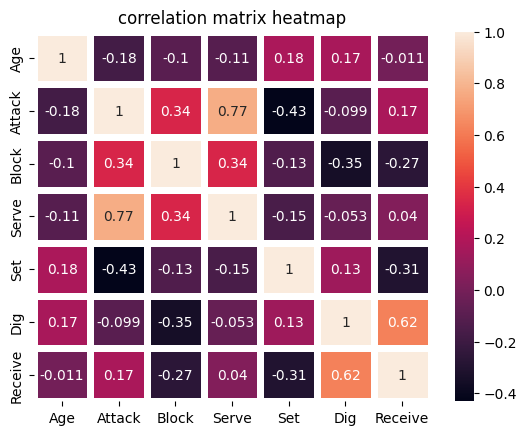

In [36]:
sns.heatmap(corr, annot=True, linewidths=5)
plt.title("correlation matrix heatmap") 
plt.show()

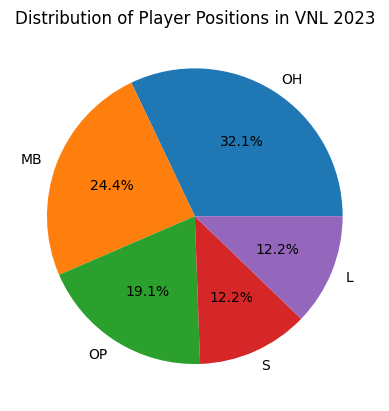

In [33]:
# # Create a pie chart to visualize the percentage distribution of player positions
plt.pie(p, labels =p.index, autopct="%1.1f%%")
plt.title("Distribution of Player Positions in VNL 2023")
plt.show()

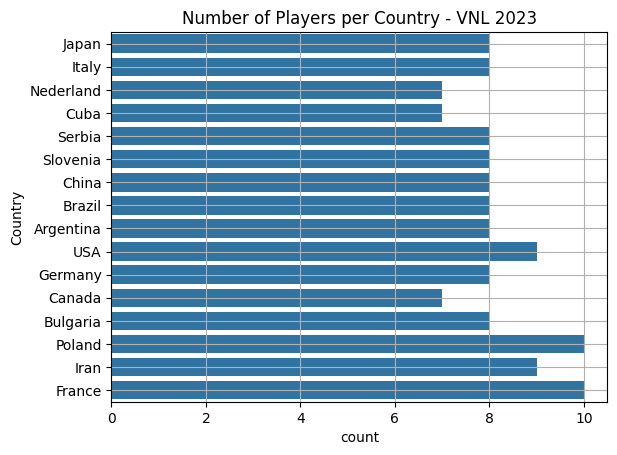

In [34]:
 # Visualize the number of players from each country using a horizontal bar chart
sns.countplot(volley, y= 'Country')
plt.title("Number of Players per Country - VNL 2023")
plt.grid(True)
plt.show()

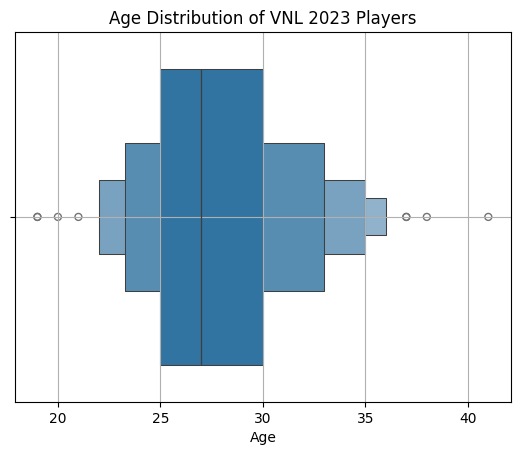

In [37]:
# Show distribution of player ages using a boxplot :
sns.boxenplot(volley, x='Age')
plt.title("Age Distribution of VNL 2023 Players")
plt.grid(True)
plt.show()


In [43]:
# avg_attack_by_country   
avg_attack_by_country = volley.groupby('Country')['Attack'].mean().sort_values()
avg_attack_by_country

Country
USA          4.600000
Iran         4.707778
Germany      4.833750
China        5.093750
Brazil       5.250000
Bulgaria     5.282500
Canada       5.405714
Poland       5.807000
Nederland    5.880000
Argentina    5.925000
Slovenia     5.961250
Italy        5.965000
Serbia       5.998750
Cuba         6.344286
Japan        6.595000
France       6.670000
Name: Attack, dtype: float64

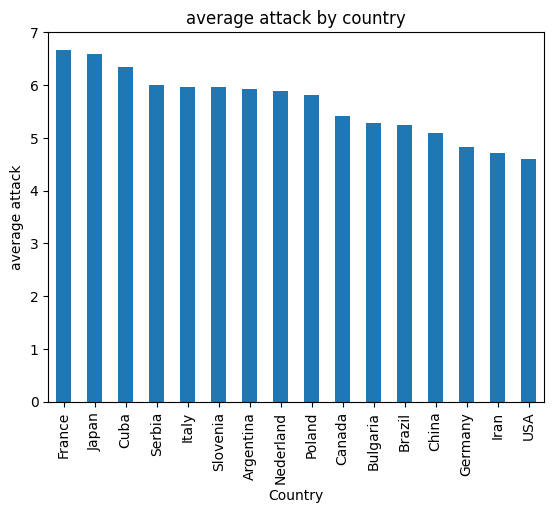

In [55]:
avg_attack_by_country.sort_values(ascending=False).plot(kind= 'bar')
plt.title("average attack by country")
plt.ylabel("average attack")
plt.show()

In [60]:
# AVG attack and block for each country
avg_att_block= volley.groupby('Country')[['Attack', 'Block']].mean()
avg_att_block

,Attack,Block
Country,,
Argentina,5.925000,1.060000
Brazil,5.250000,0.787500
Bulgaria,5.282500,0.745000
Canada,5.405714,0.725714
China,5.093750,0.707500
Cuba,6.344286,0.965714
France,6.670000,0.908000
Germany,4.833750,0.630000
Iran,4.707778,0.932222


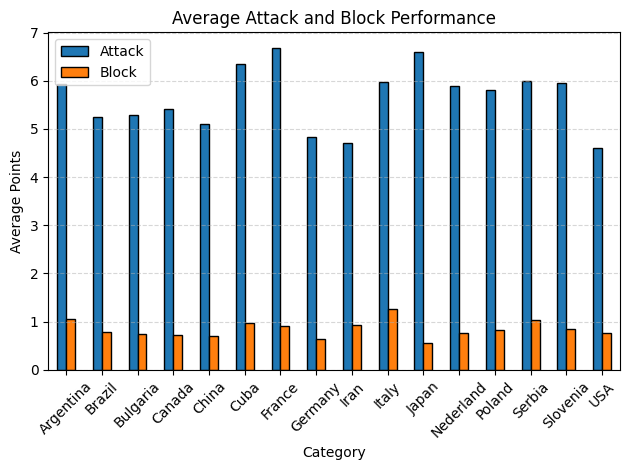

In [63]:
# Plot average attack and block values using a bar chart
avg_att_block.plot(kind='bar', edgecolor='black')
plt.title("Average Attack and Block Performance")
plt.xlabel("Category")
plt.ylabel("Average Points")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [66]:
 #  reception performance for all libero (L) players
l= volley[volley['Position']== 'L']
l.head()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
115,Yamamoto Tomohiro,Japan,29,0.0,0.0,0.0,0.0,8.73,4.80,L
116,Kovacic Jani,Slovenia,31,0.0,0.0,0.0,0.0,9.85,6.69,L
117,Danani Santiago,Argentina,28,0.0,0.0,0.0,0.0,8.69,6.15,L
118,Grebennikov Jenia,France,33,0.0,0.0,0.0,0.0,11.44,4.78,L
119,Shoji Erik,USA,34,0.0,0.0,0.0,0.0,5.60,3.80,L


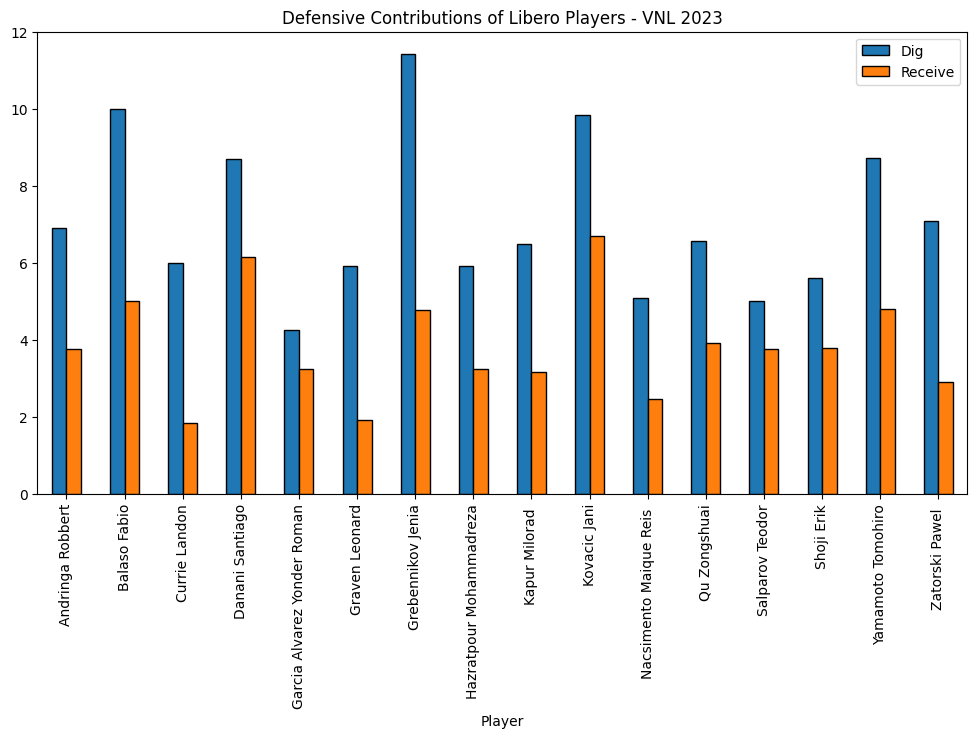

In [86]:
# Compare total Dig and Receive scores for each libero (L) player
ll = l.groupby('Player')[['Dig', 'Receive']].sum()
ll[['Dig', 'Receive']].plot(kind='bar', figsize=(12, 6), edgecolor='black')
plt.title("Defensive Contributions of Libero Players - VNL 2023")
plt.show()


In [102]:
#The top 10 players have the highest combined scores in Attack, Block, and Serve
combined = volley.groupby('Player')[['Attack', 'Block', 'Serve']].sum()[0: 10]
combined['Total']= combined['Attack'] + combined['Block'] + combined['Serve']
combined

,Attack,Block,Serve,Total
Player,,,,
Abdel-Aziz Nimir,15.33,0.67,2.08,18.08
Anderson Matthew,9.07,0.53,1.13,10.73
Andringa Robbert,0.00,0.00,0.00,0.00
Asparuhov Asparuh,5.92,0.50,0.17,6.59
Atanasov Martin,8.33,1.08,0.67,10.08
Averill Taylor,2.87,0.47,0.40,3.74
Balaso Fabio,0.00,0.00,0.00,0.00
Bieniek Mateusz,5.09,0.82,1.09,7.00
Bohme Yan,3.42,0.50,0.00,3.92


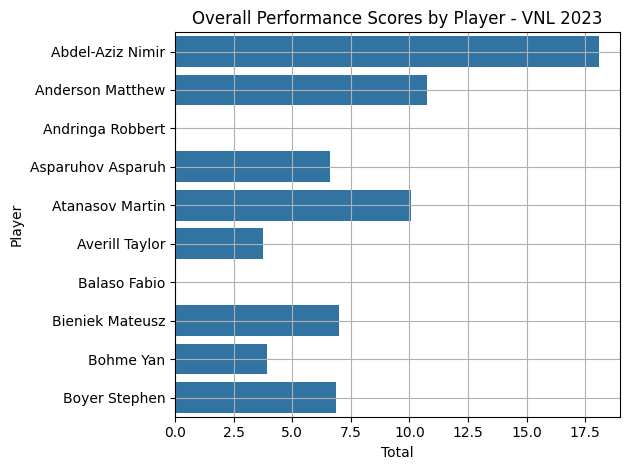

In [109]:
# Display total performance Points for each player using a horizontal bar chart
sns.barplot(combined, x='Total', y='Player')
plt.title("Overall Performance Points by Player - VNL 2023")
plt.grid(True)
plt.tight_layout()
plt.show()


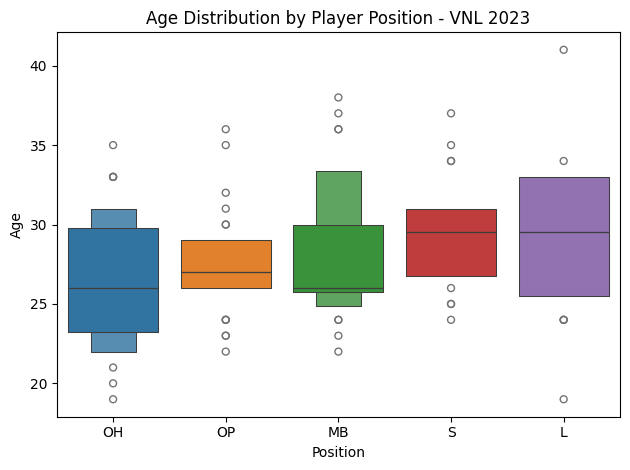

In [112]:
# Compare age distributions across player positions using a boxeplot
sns.boxenplot(volley, x='Position', y='Age', hue='Position')
plt.title("Age Distribution by Player Position - VNL 2023")
plt.tight_layout()
plt.show()


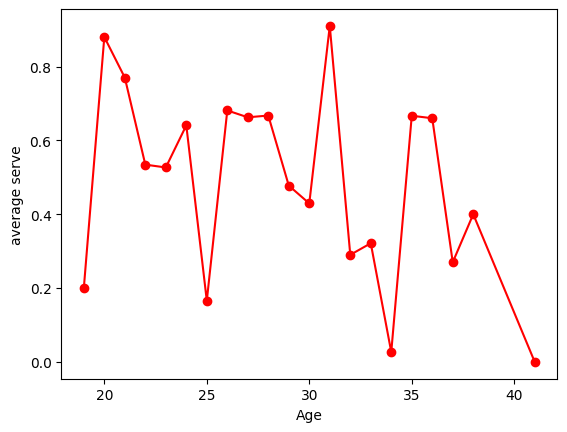

In [115]:
serve_trend_by_age = volley.groupby("Age")["Serve"].mean()

serve_trend_by_age.plot(kind = "line",marker= 'o',  color = "red")
plt.ylabel("average serve")
plt.show()

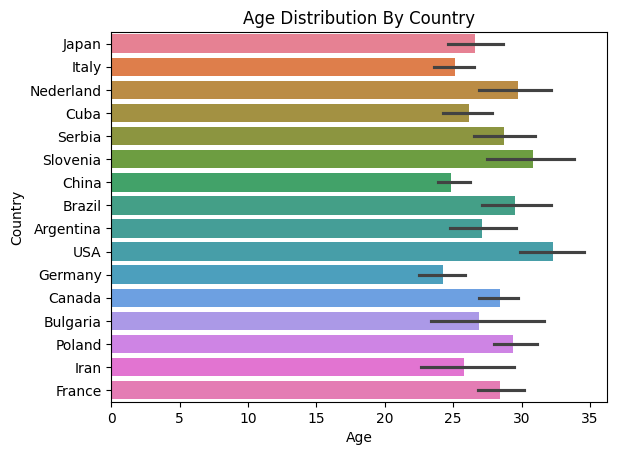

In [118]:
# Who's country has the most age distribution? 
sns.barplot(volley, x= 'Age', y= 'Country', hue= 'Country')
plt.title('Age Distribution By Country')
plt.show()